In [1]:
from pylab import *
from numpy import linalg as LA

### 1) Nullclines

In [2]:
a1 = 5
a2 = 5
b = 4
g = 4

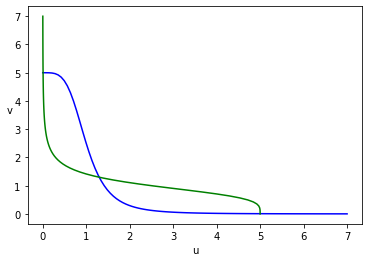

In [3]:
ve = np.linspace(0.0, 7.0, num=100)
ue = np.linspace(0.0, 7.0, num=100)
#ve = arange(0., 12., 100)
#ue = arange(0., 12., 100)

def u(x):
    return (a1 / (1 + x**b))

def v(x):
    return (a2 / (1 + x**g))

uresult = []
for i in ve:
    uresult.append(u(i))

vresult = []
for i in ue:
    vresult.append(v(i))

plot(ve, uresult, 'b')
plot(vresult, ue, 'g')
plt.xlabel('u')
plt.ylabel('v', rotation='horizontal')
show()

### 2) Dynamics simulation

In [4]:
a1 = 5
a2 = 5
b = 4
g = 4
Dt = 0.01

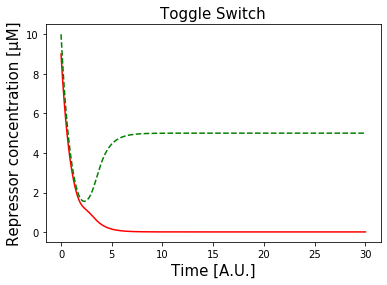

In [7]:
def initialize():
    global u, v, uresult, vresult, t, timesteps
    u = 9
    v = 10
    uresult = [u]
    vresult = [v]
    t = 0.
    timesteps = [t]

def observe():
    global u, v, uresult, vresult, t, timesteps
    uresult.append(u)
    vresult.append(v)
    timesteps.append(t)

def update():
    global u, v, uresult, vresult, t, timesteps
    nextu = u + (a1 / (1 + v**b) - u) * Dt
    nextv = v + (a2 / (1 + u**g) - v) * Dt
    u, v = nextu, nextv
    t += Dt

initialize()
while t < 30.:
    update()
    observe()

plot(timesteps, uresult, 'r-')
plot(timesteps, vresult, 'g--')
plt.xlabel('Time [A.U.]', fontsize=15)
plt.title('Toggle Switch', fontsize=15)
plt.ylabel('Repressor concentration [\u03bcM]', fontsize=15)
show()

### Phase plot

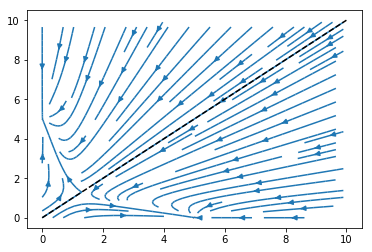

In [6]:
xvalues, yvalues = meshgrid(arange(0, 10, 0.1), arange(0, 10, 0.1))
xdot = a1 / (1 + yvalues**b) - xvalues
ydot = a2 / (1 + xvalues**g) - yvalues

x = np.linspace(0, 10, num=100)
y = np.linspace(0, 10, num=100)
streamplot(xvalues, yvalues, xdot, ydot)

plot(x, y, 'k--');

We see that the switching point is around (1.5, 1.5)
We also see that this point is an unstable equilibria

There are two other equilibria points, which are approximately (5, 0) and (0, 5). These are stable points.

### 3) Asymptotic analysis

Using wolfram alpha we analitically get the 3 real solutions:

In [250]:
u = [1.29915, 0.00798722, 5.] 

In [249]:
def veq(x):
    return 5 / (1 + x**4)
vres=[]
for i in u:
    vres.append(veq(i))
vres

[1.2991610589916731, 4.999999979650553, 0.007987220447284345]

Using the jacobian matrix we analyse the 3 equilibrium points and classify their stability analitically

In [253]:
def J(u, v):
    F1u = -1
    F1v = -20*v**3 / (v**4 + 1)**2
    F2u = -20*u**3 / (u**4 + 1)**2
    F2v = -1
    return np.array([[F1u, F1v], [F2u, F2v]])

In [260]:
val1 = J(1.3, 1.3)
val2 = J(5., 0.)
val3 = J(0., 5.)

In [261]:
val1

array([[-1.        , -2.95504077],
       [-2.95504077, -1.        ]])

In [267]:
w1, _ = LA.eig(val1)
w

array([ 1.95504077, -3.95504077])

Saddle point

In [268]:
w2, _ = LA.eig(val2)
w2

array([-1., -1.])

Stable point

In [269]:
w3, _ = LA.eig(val3)
w3

array([-1., -1.])

Stable point